<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data_multi_delta_(_0_4)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-0.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.4_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,27.648901,87.902601,0.096013,125.647515,125.464223,0.183292
1,0.0,1.0,65.012282,95.197327,-0.443171,169.766439,170.116398,-0.349960
2,0.0,2.0,62.053754,46.302357,0.159641,118.515752,118.373819,0.141933
3,0.0,3.0,30.567107,56.031187,0.814208,97.412502,96.584709,0.827793
4,0.0,4.0,32.729916,85.941258,-0.205068,128.466106,128.589839,-0.123733
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,24.456428,70.867756,-0.428216,104.895968,105.304210,-0.408242
119996,999.0,116.0,52.217457,27.256879,-0.096021,89.378315,89.496389,-0.118074
119997,999.0,117.0,62.596338,59.207832,-0.552344,131.251827,131.796308,-0.544482
119998,999.0,118.0,54.222279,57.886689,0.189870,122.298837,122.102117,0.196721


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    27.648901  87.902601  0.096013  125.647515  125.464223  0.183292
      1.0    65.012282  95.197327 -0.443171  169.766439  170.116398 -0.349960
      2.0    62.053754  46.302357  0.159641  118.515752  118.373819  0.141933
      3.0    30.567107  56.031187  0.814208   97.412502   96.584709  0.827793
      4.0    32.729916  85.941258 -0.205068  128.466106  128.589839 -0.123733
...                ...        ...       ...         ...         ...       ...
999.0 115.0  24.456428  70.867756 -0.428216  104.895968  105.304210 -0.408242
      116.0  52.217457  27.256879 -0.096021   89.378315   89.496389 -0.118074
      117.0  62.596338  59.207832 -0.552344  131.251827  131.796308 -0.544482
      118.0  54.222279  57.886689  0.189870  122.298837  122.102117  0.196721
      119.0  65.243438  30.653922 -0.410407  105.486953  105.916573 -0.429620

[120000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    27.648901  87.902601  0.096013  125.647515  125.464223  0.183292
      1.0    65.012282  95.197327 -0.443171  169.766439  170.116398 -0.349960
      2.0    62.053754  46.302357  0.159641  118.515752  118.373819  0.141933
      3.0    30.567107  56.031187  0.814208   97.412502   96.584709  0.827793
      4.0    32.729916  85.941258 -0.205068  128.466106  128.589839 -0.123733
...                ...        ...       ...         ...         ...       ...
999.0 115.0  24.456428  70.867756 -0.428216  104.895968  105.304210 -0.408242
      116.0  52.217457  27.256879 -0.096021   89.378315   89.496389 -0.118074
      117.0  62.596338  59.207832 -0.552344  131.251827  131.796308 -0.544482
      118.0  54.222279  57.886689  0.189870  122.298837  122.102117  0.196721
      119.0  65.243438  30.653922 -0.410407  105.486953  105.916573 -0.429620

[120000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,27.648901,87.902601,0.096013,125.647515,125.464223,0.183292
1,0.0,1.0,65.012282,95.197327,-0.443171,169.766439,170.116398,-0.349960
2,0.0,2.0,62.053754,46.302357,0.159641,118.515752,118.373819,0.141933
3,0.0,3.0,30.567107,56.031187,0.814208,97.412502,96.584709,0.827793
4,0.0,4.0,32.729916,85.941258,-0.205068,128.466106,128.589839,-0.123733
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,24.456428,70.867756,-0.428216,104.895968,105.304210,-0.408242
119996,999.0,116.0,52.217457,27.256879,-0.096021,89.378315,89.496389,-0.118074
119997,999.0,117.0,62.596338,59.207832,-0.552344,131.251827,131.796308,-0.544482
119998,999.0,118.0,54.222279,57.886689,0.189870,122.298837,122.102117,0.196721


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    27.648901  87.902601  0.096013  125.647515  125.464223  0.183292
      1.0    65.012282  95.197327 -0.443171  169.766439  170.116398 -0.349960
      2.0    62.053754  46.302357  0.159641  118.515752  118.373819  0.141933
      3.0    30.567107  56.031187  0.814208   97.412502   96.584709  0.827793
      4.0    32.729916  85.941258 -0.205068  128.466106  128.589839 -0.123733
...                ...        ...       ...         ...         ...       ...
999.0 115.0  24.456428  70.867756 -0.428216  104.895968  105.304210 -0.408242
      116.0  52.217457  27.256879 -0.096021   89.378315   89.496389 -0.118074
      117.0  62.596338  59.207832 -0.552344  131.251827  131.796308 -0.544482
      118.0  54.222279  57.886689  0.189870  122.298837  122.102117  0.196721
      119.0  65.243438  30.653922 -0.410407  105.486953  105.916573 -0.429620

[120000 rows x 6 columns]

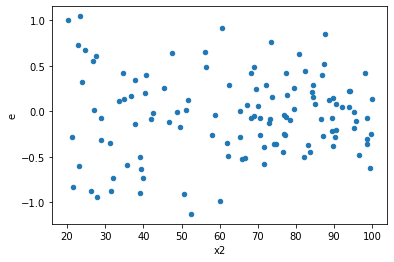

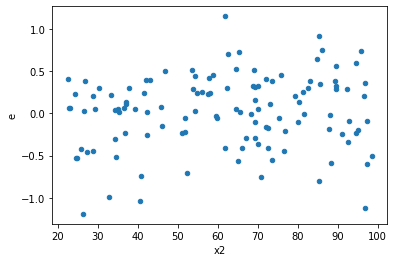

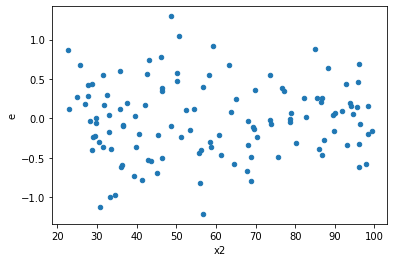

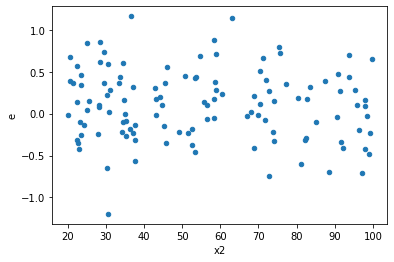

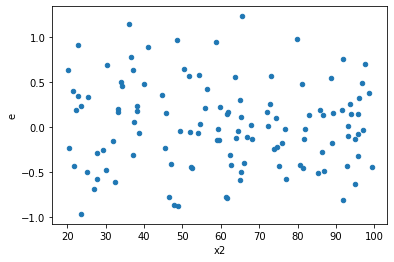

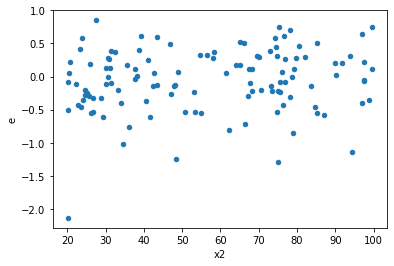

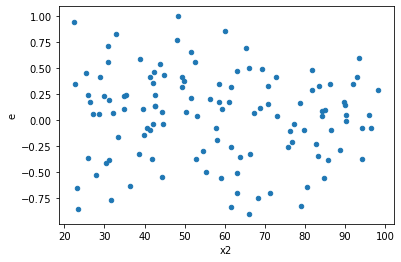

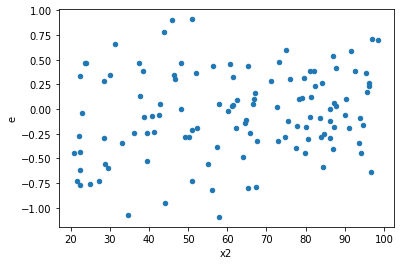

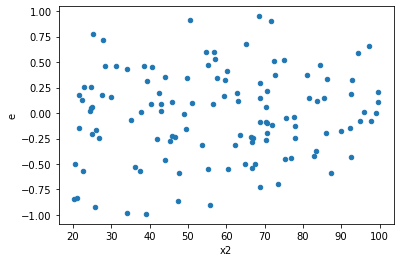

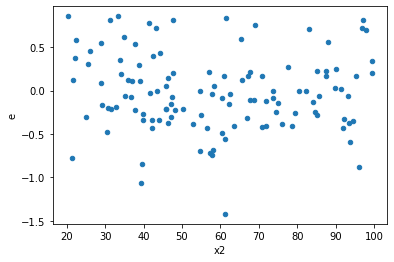

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,59.0,57.0,10.573252766856571,13.206015207134177,0.17920767401451815,0.23168447731814346,1.2928267642119724,0.3320070818081051,0.8339964590959474,0.16600354090405256,Reject005=1 : Homoscedasticity
1.0,53.0,63.0,7.353303806087024,14.959428922778331,0.13874158124692498,0.2374512527425132,1.7114642244123621,0.041262472136183614,0.9793687639319082,0.020631236068091807,Reject005=0 : Heteroscedasticity
4.0,47.0,69.0,8.263457021523546,16.314536016657705,0.175818234500501,0.23644255096605368,1.3448124515513773,0.2592564498001071,0.8703717750999465,0.12962822490005355,Reject005=1 : Homoscedasticity
8.0,50.0,66.0,9.972041902052505,15.965102894971341,0.1994408380410501,0.24189549840865668,1.2128684415118047,0.45955236795195775,0.7702238160240211,0.22977618397597888,Reject005=1 : Homoscedasticity
10.0,73.0,43.0,8.835763708617504,14.680267757944648,0.12103785902215759,0.3414015757661546,2.8206180985377185,0.00038797779603383376,0.9998060111019831,0.00019398889801691688,Reject005=0 : Heteroscedasticity
12.0,52.0,64.0,7.268533204301885,18.989381885330214,0.1397794846981132,0.2967090919582846,2.1226941321117185,0.004354955671167726,0.9978225221644161,0.002177477835583863,Reject005=0 : Heteroscedasticity
13.0,72.0,44.0,11.846768531402894,8.148023247345018,0.1645384518250402,0.1851823465305686,1.1254654731252716,0.681189630188374,0.659405184905813,0.340594815094187,Reject005=1 : Homoscedasticity
14.0,58.0,58.0,10.774827273251635,15.466832098210324,0.1857728840215799,0.26666951893466073,1.4354598645498966,0.1716607663159928,0.9141696168420036,0.0858303831579964,Reject005=1 : Homoscedasticity
18.0,44.0,72.0,5.6630814623745485,14.414820687134068,0.12870639687214883,0.20020584287686205,1.5555236394018361,0.09491146498272496,0.9525442675086375,0.04745573249136248,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,59.0,57.0,10.573252766856571,13.206015207134177,0.17920767401451815,0.23168447731814346,1.2928267642119724,0.3320070818081051,Reject005=1 : Homoscedasticity
1.0,53.0,63.0,7.353303806087024,14.959428922778331,0.13874158124692498,0.2374512527425132,1.7114642244123621,0.041262472136183614,Reject005=0 : Heteroscedasticity
2.0,58.0,58.0,10.275671870529978,9.667705352229696,0.1771667563884479,0.16668457503844303,0.9408343779403958,0.8171443991656668,Reject005=1 : Homoscedasticity
3.0,68.0,48.0,16.34657139984933,7.823346072785608,0.24039075588013722,0.16298637651636683,0.6780060070098307,0.13930467200690314,Reject005=1 : Homoscedasticity
4.0,47.0,69.0,8.263457021523546,16.314536016657705,0.175818234500501,0.23644255096605368,1.3448124515513773,0.2592564498001071,Reject005=1 : Homoscedasticity
5.0,56.0,60.0,12.527303945625487,12.333588897581901,0.2237018561718837,0.20555981495969836,0.9189008016176419,0.7510519009061944,Reject005=1 : Homoscedasticity
6.0,56.0,60.0,15.731948052113724,9.813544696756097,0.2809276437877451,0.16355907827926827,0.5822106933799842,0.04253596700119923,Reject005=0 : Heteroscedasticity
7.0,71.0,45.0,16.36377106019519,9.723900937396538,0.23047564873514353,0.21608668749770082,0.9375684098671174,0.7956979196322581,Reject005=1 : Homoscedasticity
8.0,50.0,66.0,9.972041902052505,15.965102894971341,0.1994408380410501,0.24189549840865668,1.2128684415118047,0.45955236795195775,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      873
Reject005=0 : Heteroscedasticity    127
Name: Result_test, dtype: int64